In [1]:
import os
import json
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
path = '../coco'
print(os.listdir(path))

with open(os.path.join(path, 'annotations/instances_train2014.json')) as f:
    instances = json.load(f)
print(instances.keys())

['annotations_trainval2014.zip', 'annotations', 'captions_train2014.json', 'captions_val2014.json', 'images']
dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])


In [3]:
categories = instances['categories']
supercategories, names = [], []
for c in categories:
    supercategories.append(c['supercategory'])
    names.append(c['name'])

In [4]:
ids_and_category, cat_ids = {}, []
for a in instances['annotations']:
    # print(a.keys())
    cat_ids.append(a['category_id'])
    ids_and_category[a['image_id']] = a['category_id']
print(set(cat_ids))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90}


In [5]:
with open(os.path.join(path, 'captions_train2014.json')) as f:
    annotations = json.load(f)['annotations']

In [6]:
img_ids, ids, captions = [], [], []
for ann in annotations:
    img_id, id, caption = ann.values()
    ids.append(id)
    img_ids.append(img_id)
    captions.append(caption)

In [7]:
instance_ids = ids_and_category.keys()


In [8]:
len(set(instance_ids)), len(instance_ids)

(82081, 82081)

In [9]:
len(set(ids)), len(ids)

(414113, 414113)

In [10]:
len(set(img_ids)), len(img_ids)

(82783, 414113)

In [11]:
len(set(img_ids).intersection(set(instance_ids))), len(set(ids).intersection(set(instance_ids)))


(82081, 40945)

In [12]:
from sklearn.model_selection import train_test_split
x, y = list(ids_and_category.keys()), list(ids_and_category.values())
x_train, x_test = train_test_split(x, train_size = 0.1, stratify = y, random_state = 0)

In [13]:
train_categories = [ids_and_category[k] for k in x_train]

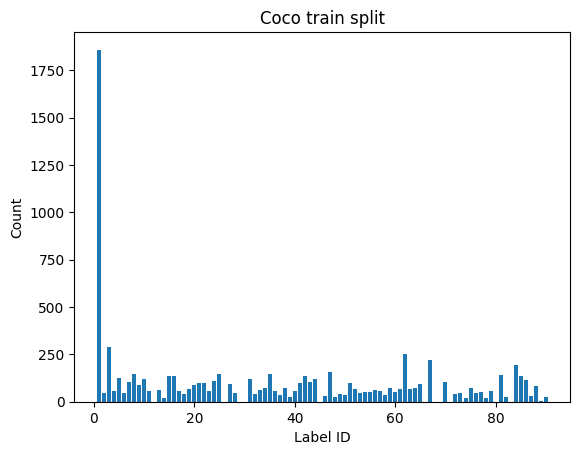

In [14]:
counts_train =Counter(train_categories)

plt.title('Coco train split')
plt.bar(counts_train.keys(), counts_train.values())
plt.ylabel('Count')
plt.xlabel('Label ID')
plt.show()

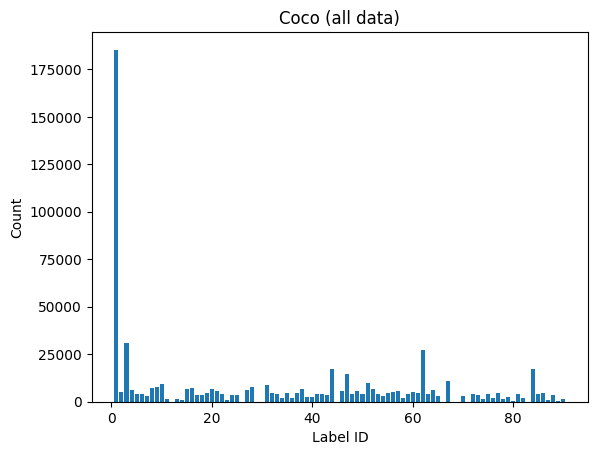

In [15]:
counts = Counter(cat_ids)
plt.title('Coco (all data)')
plt.bar(counts.keys(), counts.values())
plt.ylabel('Count')
plt.xlabel('Label ID')
plt.show()

In [16]:
# import pandas as pd
# df = pd.DataFrame([])
# df['categories'] = counts_train.keys()
# df['train'] = counts_train.values()
# df['all'] = counts.values()
# df.plot(x="categories", y=["train", "all"], kind="bar", rot=90, logy = True)

In [18]:
import numpy as np
np.save('../coco/train_img_ids.npy', x_train)